In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=1
paper='2004.04168'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down the Hamiltonian provided:

1) Kinetic Term: 
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$

2) Hartree Term:
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$

3) Fock Term:
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

4) Interaction potential in momentum space: 
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Let's identify the flavor dimensions (D) and the basis order.

In this Hamiltonian, `s` appears to be a spin or orbital index, since it's used to label the creation and annihilation operators. Let's count all the potential flavors:

From the Kinetic term: we have $c^\dagger_s(k) c_s(k)$, where `s` is likely a spin or orbital index.
From the Hartree term: we h

In [7]:
print(generated_code['thinking'])

Let's break down the Hamiltonian provided:

1) Kinetic Term: 
$\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$

2) Hartree Term:
$H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$

3) Fock Term:
$H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

4) Interaction potential in momentum space: 
$U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Let's identify the flavor dimensions (D) and the basis order.

In this Hamiltonian, `s` appears to be a spin or orbital index, since it's used to label the creation and annihilation operators. Let's count all the potential flavors:

From the Kinetic term: we have $c^\dagger_s(k) c_s(k)$, where `s` is likely a spin or orbital index.
From the Hartree term: we have $\langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}

In [8]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up, down

2) EXP-VAL DEPENDENT TERMS: {
   "\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "Mean density for spin s, calculated as np.mean(exp_val[s, s, :])",
   "\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "Mean spin-flip term, calculated as np.mean(exp_val[s, s', :])"
}

TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[s, s, k], NI
- $\frac{1}{N} \sum_{k_1} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k], I (Hartree term)
- $-\frac{1}{N} \sum_{k_1} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s', s, k], I (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """A class implementing the Hartree-Fock Hamiltonian for a triangular lattice model with 
    on-site and nearest-neighbor interactions.

    Args:
        N_shell (int): Number of shells in the fir

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """A class implementing the Hartree-Fock Hamiltonian for a triangular lattice model with 
    on-site and nearest-neighbor interactions.

    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_1': 6.0, 't_2': 1.0, 'U_0': 1.0, 'U_1': 0.5, 'T': 0.0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # Dimension for spin (up, down)
        self.basis_order = {'0': 'spin'}
        # Order for spin: 0 = up, 1 = down

        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
      

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_1.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

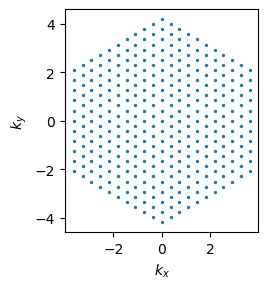

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

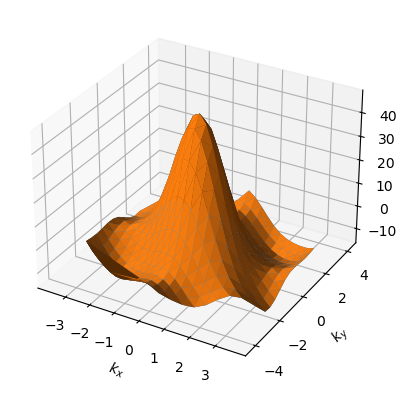

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

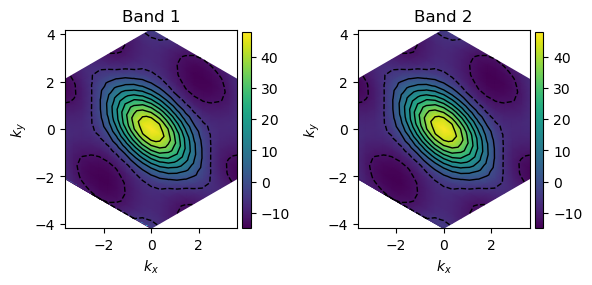

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


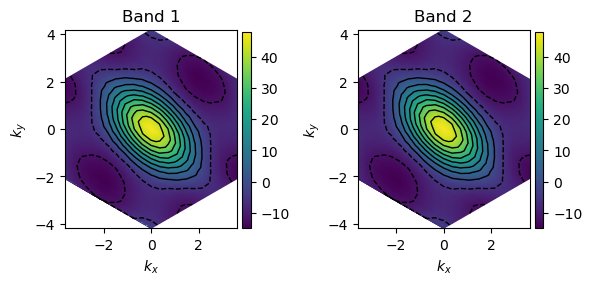

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


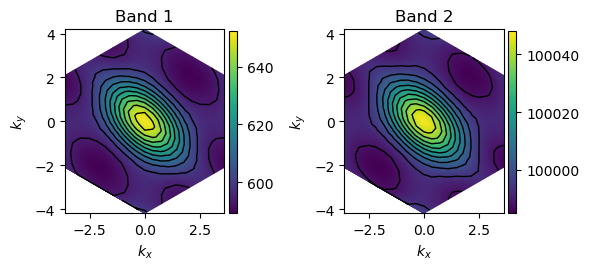

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 99332.80
U/T is 4460.79
mean_U is 25151.06


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

To evaluate whether the image meets the requirements described in the rubric, I need to analyze:

1. Whether the image shows a momentum space mesh in the first Brillouin zone
2. Check if the point group symmetry is appropriate for the given problem

Let's analyze the image:

The image shows a plot with k_x on the x-axis and k_y on the y-axis. The plot displays a collection of points (blue dots) arranged in a hexagonal pattern. The axes range from approximately -4 to 4 for both k_x and k_y.

Now let's check against the rubric requirements:

1. **Momentum space mesh in the first Brillouin zone**:
   - The problem mentions a triangular lattice. The first Brillouin zone of a triangular lattice is a hexagon in momentum space.
   - In the image, we can see the points forming a hexagonal pattern, which is consistent with the first Brillouin zone of a triangular lattice.
   - The mesh appears to be a grid of discrete k-points distributed acr

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I'll analyze the band structure plots shown in the image according to the rubric provided.

### 1. Identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

In the image, I can see that the Brillouin zone boundary forms a hexagon. This is indeed the expected shape for a triangular lattice in reciprocal space. The boundary of the first Brillouin zone for a triangular lattice should be a regular hexagon, which is what we observe in the plots for both Band 1 and Band 2.

So, this point is correct.

### 2. Examine the symmetry of the energy distribution shown by the false color plot:

#### 2.1 Identify the highest energy regions (yellow)

In both Band 1 and Band 2, the highest energy regions (yellow color) appear to be at the center of the Brillouin zone, around k_x = 0, k_y = 0. The energy decreases (transitions to green, blue, and purple) as we move away from the center.

#### 2

In [46]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [41]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

I
I'm given a task to evaluate the provided false color plot of a band structure calculation, specifically for a triangular lattice with a given Hamiltonian treated in the Hartree-Fock approximation. Let me go through the rubric step by step to analyze the images.

First, I need to understand what's shown in the image:
- There are two plots labeled "Band 1" and "Band 2"
- Both show a false color representation of energy in the first Brillouin zone
- The x and y axes are labeled kx and ky, ranging from about -4 to 4
- The color scale shows energy values, with yellow representing highest energy (~40-45) and purple representing lowest energy (~-10)

Now, let me evaluate according to the rubric:

1. **Shape of the Brillouin zone boundary**
   The Brillouin zone boundary appears to be hexagonal, which is indeed what we expect for a triangular lattice. The boundary extends to form a regular hexagon, consistent with the reciprocal lattice o

In [42]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [43]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

Let me
Let me analyze the image according to the rubric:

First, I'll identify what I'm seeing in the image:
- The image shows two false color plots labeled "Band 1" and "Band 2"
- They appear to be energy bands plotted in k-space (with k_x and k_y axes)
- The color scale indicates energy values, with yellow being higher energy and purple being lower energy
- Both bands have a similar overall pattern but with different energy ranges

Let me go through the rubric points one by one:

1. Shape of the Brillouin zone boundary:
The plots show a hexagonal boundary, which is indeed the expected shape for a Brillouin zone of a triangular lattice. The hexagonal boundary is visible in both band plots, with k_x ranging from approximately -2.5 to 2.5 and k_y ranging from approximately -4 to 4. This is correct for a triangular lattice.

2. Symmetry of the energy distribution:
2.1 Highest energy regions (yellow): In both bands, the highest energy r

In [44]:
answer4=utils_auto.extract_result_content(result4['text'])

In [45]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '1' saved to final_answer.yaml
